# Estatística Básica em R

Agora que já vimos o básico de **R**, como importação datasets, criação de variáveis e manipulação de dados, estamos prontos para entender como essa linguagem é utilizada efetivamente para fazer análises estatísticas!

Mas não se preocupe, vamos explorando os diversos temas de estatística enquanto aplicamos o que aprendemos de R nas partes passadas.

## Tipos de Dados

Um dos pontos base da Estatística consiste em entender nossas informações e como elas elas são organizadas: os **dados**. Esses dados podem ser divididos em dois tipos diferentes: dados **qualitativos** e dados **quantitativos**.

### Dados Qualitativos

Esses dados representam **categorias** do nosso espaço, ou seja, eles dividem os indivíduos em diversas classes que não se intersectam. Por exemplo, a cor de uma flor é um tipo de dado qualitativo, já que as categoriza em classes como: *'amarelo'*, *'rosa'*, *'vermelho'*, *'azul'*, etc. Esses dados são bem úteis para representar características que não são facilmente descritas por números, como qualidades (daí vem o nome).

In [1]:
# Montando um Dataframe de Cores de Flores

Flor = c("Margarida", "Hortênsia", "Violeta", "Rosa")
Cor = c("Amarelo", "Azul", "Azul", "Vermelho")
flores = data.frame(Flor, Cor)
flores

Flor,Cor
Margarida,Amarelo
Hortênsia,Azul
Violeta,Azul
Rosa,Vermelho


In [2]:
# Mostrando as flores de cor Azul

flores[flores$Cor == "Azul",]

,Flor,Cor
2,Hortênsia,Azul
3,Violeta,Azul


### Dados Quantitativos

São tipos de dados **numéricos**, ou seja, são mensuráveis e podem ser manipulados matematicamente. Essa categoria engloba os dados representáveis por números, como a altura de uma pessoa ou a área de um terreno. Esses dados são mais versáteis, já que conseguimos fazer comparações, médias e outros tipos de operações aritméticas que não são possíveis com os dados qualitativos.

In [3]:
# Montando um Dataframe de Altura de Pessoas

Nome = c("Marcela", "Alexandre", "Rafaela", "Mariana", "Victor")
Altura = c(161, 184, 172, 174, 169)
alturas = data.frame(Nome, Altura)
alturas

Nome,Altura
Marcela,161
Alexandre,184
Rafaela,172
Mariana,174
Victor,169


In [4]:
# Selecionando as pessoas com altura maior que 170 cm

alturas[alturas$Altura > 170,]

,Nome,Altura
2,Alexandre,184
3,Rafaela,172
4,Mariana,174


## Estatística Descritiva

O tipo de análise estatística mais básico é a **Estatística Descritiva**, que busca simplesmente resumir e descrever os nossos dados da melhor maneira possível. Esse ramo utiliza de diversas medidas para expressar características diferentes dos nossos dados, como veremos a seguir.

### Dataset

Antes de qualquer coisa, vamos explicar essas medidas usando o dataset 'mpg', nativo do R.

O 'mpg' é uma base de dados que apresenta diversas informações relacionadas à economia de combustível de modelos de automóvel lançados de 1999 a 2008. Algumas das características dos carros que aparecem no dataset são: 
  - **Marca** ('manufacturer') 
  - **Modelo** ('model')
  - **Ano de Lançamento** ('year')
  - **Cilindradas** ('displ')
  - **Quantidade de Cilindros** ('cyl')
  - **Tipo de Combustível** ('fl') - 'diesel', 'gasolina', 'elétrico'...
  - **Classe** ('class') - 'compacto', 'SUV', 'minivan'...
  - **Consumo de Combustível na Cidade** ('cty') - em mpg
  - **Consumo de Combustível na Estrada** ('hwy') - em mpg

In [5]:
# O dataset requer o pacote ggplot2
require(ggplot2)

# Montando o dataset
consumo = mpg

# Selecionando e reordenando as colunas mais importantes
consumo <- consumo[c("manufacturer", "model", "year", "displ", "cyl", "fl", "class", "cty", "hwy")]

# Conversão de milhas por galão de combustível para quilometros por litro
consumo$cty <- consumo$cty * 0.425144
consumo$hwy <- consumo$hwy * 0.425144

# Apresentando o dataset
head(consumo)

Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


manufacturer,model,year,displ,cyl,fl,class,cty,hwy
audi,a4,1999,1.8,4,p,compact,7.652592,12.32918
audi,a4,1999,1.8,4,p,compact,8.928024,12.32918
audi,a4,2008,2.0,4,p,compact,8.502880,13.17946
audi,a4,2008,2.0,4,p,compact,8.928024,12.75432
audi,a4,1999,2.8,6,p,compact,6.802304,11.05374
audi,a4,1999,2.8,6,p,compact,7.652592,11.05374


### Medidas de Tendência Central

As **Medidas de Tendência Central** procuram representrar um valor central em torno do qual os dados se agrupam. Você provavelmente já ouviu falar de alguns exemplos desse tipo de medida, como a **média** e a **mediana**.

#### Média

A **Média** é a medida numérica que representa a posição central dos nossos dados. Seu valor é obtido ao dividir a soma de todos os nossos dados pela sua quantidade.

$$\large \bar x ={\frac {1}{N}}\sum _{i=1}^{N}x_{i}$$

In [6]:
# Média do consumo dos automóveis da Toyota

mean(consumo$cty[consumo$manufacturer == "toyota"])

[1] 7.877668

In [7]:
# Média do consumo dos automóveis da Ford e da Volkswagen

media_a = mean(consumo$cty[consumo$manufacturer == "ford"])
media_b = mean(consumo$cty[consumo$manufacturer == "volkswagen"])

# A eficiência dos carros da Ford é, em média, bem inferior aos da Volkswagen

cat(media_a, " < ", media_b)

5.952016  <  8.896532

In [8]:
# Não é possível calcular a média de dados qualitativos

mean(consumo$manufacturer)

Warning message in mean.default(consumo$manufacturer):
"argument is not numeric or logical: returning NA"

[1] NA

#### Mediana

A **Mediana** é a medida numérica que representa o dado que se encontra na metade da nossa distribuição quanto esta se encontra ordenada. Ou seja, a mediana é o valor que divide os nossos dados de tal forma que metade deles sejam maiores que a mediana e a outra metade seja menor.

In [9]:
# Mediana do consumo dos automóveis da Hyundai

median(consumo$cty[consumo$manufacturer == "hyundai"])

[1] 7.865164

In [10]:
# Não é possível calcular a mediana de dados qualitativos

median(consumo$manufacturer)

Warning message in mean.default(sort(x, partial = half + 0L:1L)[half + 0L:1L]):
"argument is not numeric or logical: returning NA"

[1] NA

#### Percentil

O **Percentil** não é uma medida de tendência central, mas se relaciona bastante com a Mediana. Os percentis são medidas que dividem as nossas amostras tal que **p%** delas sejam menores que o percentil. O **50º percentil**, portanto, é a nossa já conhecida mediana, enquanto o **25º percentil** é denominado primeiro quartil.

In [11]:
# Obtendo os quartis do consumo de todos os automóveis

quartis = quantile(consumo$cty)

# Transpondo o resultado para ficar mais visualizável
t(quartis)

0%,25%,50%,75%,100%
3.826296,5.952016,7.227448,8.077736,14.88004


In [12]:
# Obtendo os percentis 30%, 60% e 90% do consumo dos automóveis SUV

percentis = quantile(consumo$cty[consumo$class == "suv"], c(.30, .60, .90))

# Transpondo o resultado para ficar mais visualizável
t(percentis)

30%,60%,90%
5.101728,5.952016,7.184934


### Medidas de Variação

As **Medidas de Variação** medem o *grau de afastamento* dos dados em torno de um valor central. Elas são importantes para medir a homogeneidade dos dados, indicando se nossas amostras estão próximas entre si ou muito afastadas.

#### Amplitude

A medida mais simples de variação é a **Amplitude**, que mede simplesmente a diferença entre a maior e a menor amostra. Entretanto, essa medida é bem sensível outliers em suas extremidades.

$$ \large A =  x_{max} - x_{min} $$

In [13]:
# Calculando a amplitude do consumo de combustível das pickups

amplitude = max(consumo$cty[consumo$class == "pickup"]) - min(consumo$cty[consumo$class == "pickup"])

amplitude

[1] 3.401152

#### Amplitude Interquartil

Uma outra medida de variação mais precisa é a **Amplitude Interquartil**, definida como a diferença entre o 3º e o 1º quartil. Por desprezar os valores mais extremos, essa medida é menos sujeita a flutuações que a amplitude normal.

In [14]:
# Calculando a amplitude interquartil do consumo de combustível das pickups

IQR(consumo$cty[consumo$class == "pickup"])

[1] 1.275432

#### Box Plot

O **Box Plot** é uma representação gráfica das nossas amostras que se aproveita dos conceitos de quartis. Esse gráfico apresenta um quadro entre o 1º e o 3º quartil, com uma linha central na mediana e extremidades nos valores máximo e mínimo dos dados, da seguinte forma:

<img src="img/boxplot.png" alt="Box Plot" style="width: 300px;"/>

Essa representação é bem relevante para entender a **simetria** das nossas amostras, bem como sua dispersão.

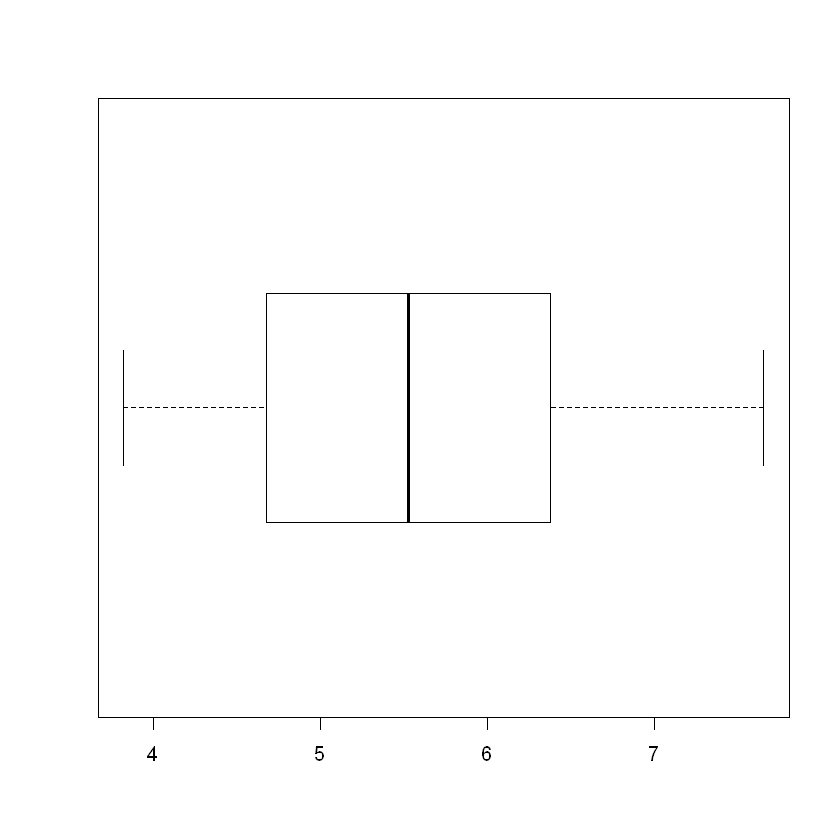

In [15]:
# Aprensentando o Box Plot do consumo de combustível dos automóveis da Dodge

boxplot(consumo$cty[consumo$manufacturer == "dodge"], horizontal=TRUE)

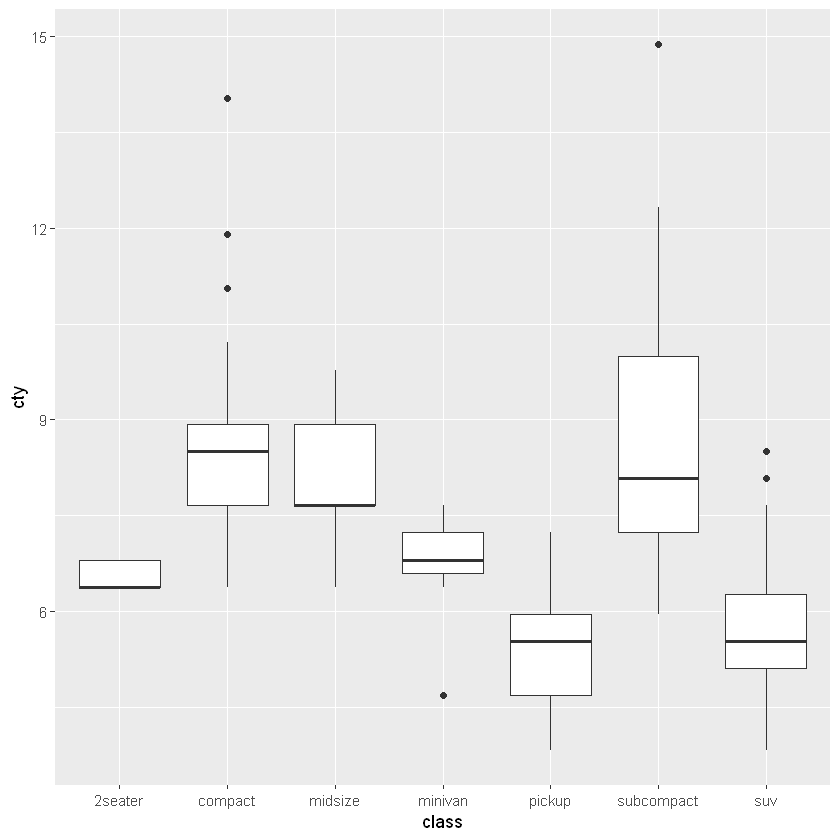

In [16]:
# Box Plot comparando o consumo de cada tipo de automóvel
require(ggplot2)

ggplot(data = consumo, aes(x=class, y=cty)) + geom_boxplot()

As pickups e os SUVs são os carros com menor eficiência de combustível.

#### Variância

A **Variância** é uma medida de variação que mensura a dispersão das amostras com relação à média.

Seu valor é obtido a partir do cálculo da média do quadrado das diferenças entre os dados e a média, da seguinte forma:
<br>
<br>

$$\large s^2 = {\frac{\sum_{i=1}^{N}(x_{i} -\bar{x})^2}{N-1}}$$

In [17]:
# Calculando a variância do consumo dos carros movidos a gasolina

var(consumo$cty[consumo$fl == "p"])

[1] 1.673004

#### Desvio Padrão

O **Desvio Padrão** é uma outra medida de variação obtida simplesmente pela raiz quadrada da variância. Essa raiz é feita para que a unidade de medida seja a mesma dos nossos dados.
<br>
<br>

$$\large s = \sqrt{\frac{\sum_{i=1}^{N}(x_{i} -\bar{x})^2}{N-1}}$$

In [18]:
# Calculando o desvio padrão do consumo dos carros movidos a gasolina

sd(consumo$cty[consumo$fl == "p"])

[1] 1.293447

#### Covariância

A **Covariância** é a medida da *relação linear* entre duas variáveis: seu valor representa o quanto elas "caminham juntas". Se a covarância é positiva, significa que as duas crescem juntas; se a covariância é negativa, significa que conforme uma cresce, a outra decresce.

Seu valor é obtido da seguinte forma:
<br>

$$\large s_{x,y}=\frac{\sum_{i=1}^{N}(x_{i}-\bar{x})(y_{i}-\bar{y})}{N-1}$$

In [19]:
# Calculando a covarância entre as cilindradas e o consumo de combustível

cov(consumo$displ, consumo$cty)

[1] -1.866676

A covariância negativa significa que quanto maiores as cilindradas, menor será a eficiência do carro

#### Coeficiente de Correlação

O **Coeficiente de Correlação** também mede a relação linear entre duas variáveis, mas é obtida a partir da divisão da covariância pelos desvios padrões individuais de cada variável. Dessa forma, encontramos uma medida **normalizada** da relação entre as duas. 
<br>
<br>

$$\large r_{x,y}= \frac{s_{x,y}}{s_{x} s_{y}}$$

Quanto mais próximo de 1, maior a _relação linear positiva_ entre as duas variáveis, e seu gráfico se aproxima de uma linha reta _crescente_. Quanto mais próximo de -1, maior a _relação linear negativa_ entre as duas variáveis, e seu gráfico se aproxima de uma linha reta _decrescente_. Quando seu valor é próximo de 0, não existe uma relação muito grande entre as duas variáveis.

In [20]:
# Calculando o coeficiente de correlação entre as cilindradas e o consumo de combustível

cor(consumo$displ, consumo$cty)

[1] -0.798524

O consumo de combustível tem uma relação linear negativa bem forte com as cilindradas.